# Financial Planning with APIs and Simulations

In [4]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as datetime
%matplotlib inline      

ModuleNotFoundError: No module named 'MCForecastTools'

In [5]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000

## Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()  # By using requests.get we can get the current price of BTC from the API endpoint

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True)) # Using json.dumps allows us to review our data


{
    "data": {
        "1": {
            "circulating_supply": 18948031,
            "id": 1,
            "last_updated": 1643918914,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 694473931742,
                    "percent_change_1h": -0.771907815890245,
                    "percent_change_24h": -2.90468844355041,
                    "percent_change_7d": -0.746596723278233,
                    "percentage_change_1h": -0.771907815890245,
                    "percentage_change_24h": -2.90468844355041,
                    "percentage_change_7d": -0.746596723278233,
                    "price": 36595.0,
                    "volume_24h": 16903357412
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18948031,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [10]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent = 4, sort_keys = True))

{
    "data": {
        "1027": {
            "circulating_supply": 119431740,
            "id": 1027,
            "last_updated": 1643918925,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 311211207460,
                    "percent_change_1h": -1.21689068437754,
                    "percent_change_24h": -4.22961406254985,
                    "percent_change_7d": 5.19687269442493,
                    "percentage_change_1h": -1.21689068437754,
                    "percentage_change_24h": -4.22961406254985,
                    "percentage_change_7d": 5.19687269442493,
                    "price": 2598.82,
                    "volume_24h": 22891007934
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119431740,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [11]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The Current Price of Bitcoin is ${btc_price}")


The Current Price of Bitcoin is $36595.0


In [12]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The Current Price of Ethereum is ${eth_price}")


The Current Price of Ethereum is $2598.82


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [13]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The Current Value of your Bitcoin holdings is ${btc_value}")


The Current Value of your Bitcoin holdings is $43914.0


In [14]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The Current Value of your Ethereum holdings is ${eth_value}")


The Current Value of your Ethereum holdings is $13773.746000000001


In [15]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total value of your cryptocurrency wallet is ${total_crypto_wallet}")


The total value of your cryptocurrency wallet is $57687.746


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

#### Review the total number of shares held in both (SPY) and (AGG).

In [16]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [17]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")  # Using os.getenv will allow us to import our API keys without exposing them

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "V2")


#### Step 3: Set the following parameters for the Alpaca API call:

In [18]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-01-31", tz = "America/Chicago").isoformat()
end_date = pd.Timestamp("2022-01-31", tz = "America/Chicago").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [19]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date).df
# The get_barset function will allow us to see our data based on the variables we input in the function

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


C:\Users\omar\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  This is separate from the ipykernel package so we can avoid doing imports until


AGG                                      SPY  \
                             open    high    low   close    volume    open   
time                                                                         
2022-01-31 00:00:00-05:00  111.64  111.89  111.6  111.78  11437834  441.24   

                                                               
                             high     low    close     volume  
time                                                           
2022-01-31 00:00:00-05:00  450.28  439.81  449.815  128202383

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [20]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price for AGG is ${agg_close_price}")


The closing price for AGG is $111.78


In [21]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"The closing price for SPY is ${spy_close_price}")

The closing price for SPY is $449.815


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [22]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value}")


The current value of the bond portfolio is $22356.0


In [23]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value}")


The current value of the stock portfolio is $49479.65


In [24]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}")


The current balance of the stock and bond portion of the portfolio is $71835.65


In [25]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"The current balance of the total portfolio is ${total_portfolio: .2f}")


The current balance of the total portfolio is $ 129523.40


### Evaluate the Emergency Fund



#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [26]:
# Consolidate financial assets data into a Python list
savings_data = ["Crypto", "Stocks/Bonds"]

# Review the Python list savings_data
savings_data
    

['Crypto', 'Stocks/Bonds']

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [27]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame({"Amount" : [total_crypto_wallet, total_stocks_bonds]}, index = [savings_data])

# Display the savings_df DataFrame
savings_df


,Amount
Crypto,57687.746
Stocks/Bonds,71835.650


<AxesSubplot:title={'center':'Total Value of Portfolio'}, ylabel='Amount'>

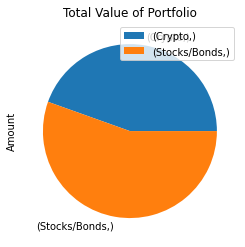

In [28]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y= "Amount", title = "Total Value of Portfolio")
# By using plot.pie we can plot a pie chart

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:


In [29]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

emergency_fund_value

36000

In [30]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value :
    print("Congratulations! You have enough money in the emergency fund.")
elif total_portfolio == emergency_fund_value :
    print("Congratulations! You have reached your goal.")
else : print("Sorry you are ${emergency_fund_value - total_portfolio} from reaching your goal.")

# if else statements allow us to get a response based on different possible outcomes

Congratulations! You have enough money in the emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [31]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date3 = pd.Timestamp("2019-01-31", tz = "America/Chicago").isoformat()
end_date3 = pd.Timestamp("2022-01-31", tz = "America/Chicago").isoformat()


In [32]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(tickers, timeframe, start = start_date3, end = end_date3).df


# Display both the first and last five rows of the DataFrame
print(prices_df.head())

print(prices_df.tail())

                              AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-09-09 00:00:00-04:00  115.84  116.1470  115.7550  116.10  3232335   
2021-09-10 00:00:00-04:00  115.99  116.0100  115.7801  115.87  2767552   
2021-09-13 00:00:00-04:00  116.00  116.0750  115.9600  116.03  3289881   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.28  4036304   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.19  3348036   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-09-09 00:00:00-04:00  450.70  452.57  448.72  448.94  51603442  
2021-09-10 00:00:00-04:00  451.04  451.49  445.31  445.50  75763259  
2021-09-13 00:00:00-04:00  448.65  448.92  444.11  446.56

C:\Users\omar\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  """


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [40]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_sim = MCSimulation(portfolio_data = prices_df, weights = [.6,.4], num_simulation = 500, num_trading_days = 252*30)

#MCSimulation function will provide us a simulation based on the data we imported + the variables we specified

# Review the simulation input data
mc_sim.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-09-09 00:00:00-04:00  115.84  116.1470  115.7550  116.10  3232335   
2021-09-10 00:00:00-04:00  115.99  116.0100  115.7801  115.87  2767552   
2021-09-13 00:00:00-04:00  116.00  116.0750  115.9600  116.03  3289881   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.28  4036304   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.19  3348036   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-09-09 00:00:00-04:00          NaN  450.70  452.57  448.72  448.94   
2021-09-10 00:00:00-04:00    -0.001981  451.04  451.49  445.31  445.50   
2021-09-13 00:00:00-04:00     0.001381  448.65  448.92  444.11  446.56   
2021-09-14 00:00:00-04:00     0.002155  448.12  448.34  443.22  444.18   
2021-09-15 00:00:00-04:00    -0.000774  444.62  448.41  443.44  447.87   

                                                  
                             volume daily_return  
time                                              
2021-09-09 00:00:00-04:00  51603442          NaN  
2021-09-10 00:00:00-04:00  75763259    -0.007662  
2021-09-13 00:00:00-04:00  75103627     0.002379  
2021-09-14 00:00:00-04:00  67959711    -0.005330  
2021-09-15 00:00:00-04:00  69265024     0.008307

In [41]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim.calc_cumulative_return()
# calc_cumulative_return function allows us to calculate the cumulative returns of our simulations

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\omar\Desktop\Fintech-Workspace\Module5C\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001884,1.001105,1.001731,1.011446,0.993336,1.000172,1.002742,0.999046,1.000220,1.000449,...,0.998570,0.996547,0.990573,0.996176,1.004699,1.003466,1.001217,0.992495,1.001104,1.001647
2,0.996601,1.003832,1.006903,1.008432,0.991368,0.999653,0.994366,0.998121,0.992647,1.001762,...,1.001155,0.989808,0.991187,0.988835,1.005230,1.008746,0.996365,0.982114,1.003544,0.987220
3,1.000922,1.001907,1.002531,0.998386,0.987268,0.997653,0.991853,0.999473,0.992162,1.003920,...,1.002466,0.994714,0.981267,0.992802,1.007819,1.007276,0.994609,0.987947,1.003484,0.989043
4,0.999496,1.000032,1.006565,1.003078,0.987950,0.996756,0.990042,0.992760,0.996737,1.002844,...,1.003538,0.995345,0.982423,0.992779,1.007680,0.998675,0.994991,0.982566,1.003679,0.985128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.129357,0.215626,0.111300,0.158679,0.184283,0.270071,0.180986,0.287587,0.170711,0.281773,...,0.239685,0.161997,0.233606,0.228087,0.351267,0.114299,0.138203,0.158322,0.181663,0.182326
7557,0.128475,0.215933,0.111170,0.158722,0.183083,0.270562,0.181407,0.289016,0.169435,0.283196,...,0.238385,0.160885,0.232193,0.228615,0.353053,0.113249,0.137830,0.157530,0.181433,0.183484
7558,0.128923,0.217192,0.111549,0.157722,0.182948,0.273240,0.180416,0.288363,0.168100,0.282901,...,0.238160,0.158430,0.229923,0.229623,0.352089,0.112418,0.137545,0.157156,0.180655,0.183266
7559,0.129266,0.216931,0.111189,0.156481,0.183490,0.271464,0.180082,0.286791,0.167259,0.282190,...,0.238041,0.157669,0.227607,0.227479,0.351842,0.111173,0.138205,0.157246,0.181396,0.182083


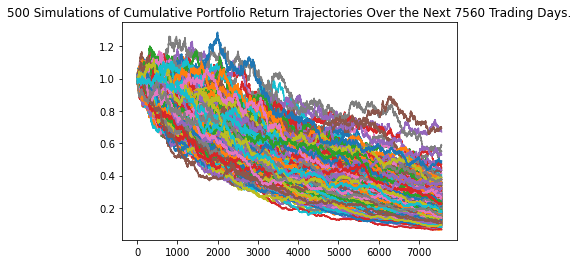

In [42]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_sim_lineplot = mc_sim.plot_simulation()
# The plot_simulation function will plot all our simulations in a overlay line plot

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

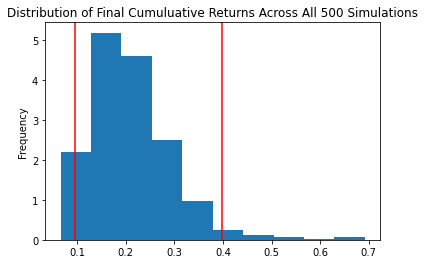

In [43]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_sim_distribution = mc_sim.plot_distribution()
# The plot_distribution function will allow us to plot the probability distribution of our function

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [44]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mc_sim_stats = mc_sim.summarize_cumulative_return()

# The summarize_cumulative_return function will give us the summary stats from our simulation results

# Review the 30-year Monte Carlo summary statistics
print(mc_sim_stats)

count           500.000000
mean              0.211320
std               0.084032
min               0.065953
25%               0.152649
50%               0.197822
75%               0.253761
max               0.691985
95% CI Lower      0.095499
95% CI Upper      0.397432
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [45]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}")


The current balance of the stock and bond portion of the portfolio is $71835.65


In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_sim_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_sim_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f"The lower 95% confidence interval is ${ci_lower_thirty_cumulative_return: .2f}")
print(f"The upper 95% confidence interval is ${ci_upper_thirty_cumulative_return: .2f}")


The lower 95% confidence interval is $ 6860.22
The upper 95% confidence interval is $ 28549.82


### Forecast Cumulative Returns in 10 Years

In [48]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mc_sim2 = MCSimulation(portfolio_data = prices_df, weights = [.80,.20], num_simulation = 500, num_trading_days = 252*10)

# Review the simulation input data
mc_sim2.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-09-09 00:00:00-04:00  115.84  116.1470  115.7550  116.10  3232335   
2021-09-10 00:00:00-04:00  115.99  116.0100  115.7801  115.87  2767552   
2021-09-13 00:00:00-04:00  116.00  116.0750  115.9600  116.03  3289881   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.28  4036304   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.19  3348036   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-09-09 00:00:00-04:00          NaN  450.70  452.57  448.72  448.94   
2021-09-10 00:00:00-04:00    -0.001981  451.04  451.49  445.31  445.50   
2021-09-13 00:00:00-04:00     0.001381  448.65  448.92  444.11  446.56   
2021-09-14 00:00:00-04:00     0.002155  448.12  448.34  443.22  444.18   
2021-09-15 00:00:00-04:00    -0.000774  444.62  448.41  443.44  447.87   

                                                  
                             volume daily_return  
time                                              
2021-09-09 00:00:00-04:00  51603442          NaN  
2021-09-10 00:00:00-04:00  75763259    -0.007662  
2021-09-13 00:00:00-04:00  75103627     0.002379  
2021-09-14 00:00:00-04:00  67959711    -0.005330  
2021-09-15 00:00:00-04:00  69265024     0.008307

In [49]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim2.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\omar\Desktop\Fintech-Workspace\Module5C\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998007,0.998001,0.996761,0.998183,0.997612,0.994616,1.002461,1.002811,0.998950,1.001987,...,1.002655,0.998683,1.001217,0.997383,0.999782,1.000636,1.001247,0.997404,1.001014,0.997708
2,0.997576,0.996776,0.998342,0.992986,0.999383,0.994054,1.000901,1.003231,0.997548,0.999166,...,1.002842,0.999048,1.000925,0.998544,0.998529,1.002884,0.994984,0.994490,1.000339,0.994421
3,0.998982,0.995109,1.000991,0.989427,1.003115,0.992211,0.996412,1.002893,1.003881,0.998284,...,0.999701,0.998021,1.001834,1.000160,1.002097,1.000585,0.992713,0.989169,0.998380,0.995831
4,1.000743,0.995831,1.000451,0.987260,1.008129,0.988175,0.994554,0.996513,1.000823,0.995454,...,1.001879,0.994429,0.997843,0.997793,1.001113,1.002667,0.989469,0.986060,0.996415,0.997838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.646531,0.446625,0.475831,0.480319,0.389355,0.393223,0.568505,0.479652,0.534137,0.420652,...,0.688549,0.527921,0.348885,0.522435,0.415280,0.616986,0.475066,0.465335,0.477418,0.457224
2517,0.644886,0.446350,0.472820,0.480337,0.388434,0.391182,0.567268,0.479387,0.534487,0.421750,...,0.687568,0.530353,0.348626,0.522042,0.414788,0.616907,0.477048,0.465883,0.477895,0.458305
2518,0.642759,0.447359,0.472839,0.481353,0.390575,0.390764,0.567293,0.478833,0.534294,0.422947,...,0.685554,0.528621,0.347512,0.523672,0.414943,0.614994,0.477915,0.467971,0.474777,0.458271
2519,0.642018,0.448552,0.471231,0.479686,0.390603,0.389956,0.570324,0.479474,0.533004,0.423990,...,0.687148,0.529839,0.347115,0.521965,0.412756,0.612938,0.479758,0.465168,0.476047,0.455578


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

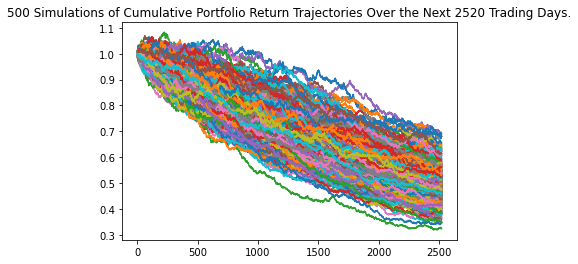

In [50]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mc_sim2.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

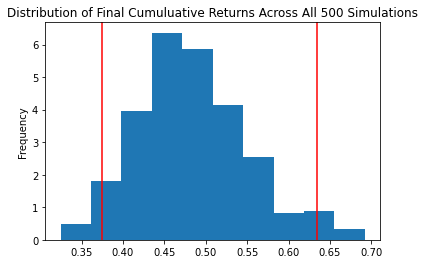

In [51]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc_sim2.plot_distribution()


In [53]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
mc_sim2_stats = mc_sim2.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(mc_sim2_stats)

count           500.000000
mean              0.483408
std               0.066495
min               0.324458
25%               0.437701
50%               0.476266
75%               0.523424
max               0.692138
95% CI Lower      0.374257
95% CI Upper      0.634397
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [54]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}")


The current balance of the stock and bond portion of the portfolio is $71835.65


In [55]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_sim2_stats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_sim2_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f"The lower 95% confidence interval is ${ci_lower_ten_cumulative_return: .2f}")
print(f"The upper 95% confidence interval is ${ci_upper_ten_cumulative_return: .2f}")


The lower 95% confidence interval is $ 26884.97
The upper 95% confidence interval is $ 45572.35


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
# There is no way that weighting the portfolio heavily towards stocks will allow anyone to reitre after 10 years
# as we can see the upper 95% confidence interval results in a cumulative return of  about $45,572 which is only 
# enough to last max 4 months based on the $12000 monthly income/expense. 